In [1]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D as Line
from matplotlib.patheffects import Stroke
import matplotlib.ticker as mticker
import numpy as np
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform
import pandas as pd
import seaborn as sns
import cmocean
import netCDF4 as nc
import glob



In [2]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load data

In [3]:
fname1 = np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S18-Sv38.csv'))
fname2 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv120.csv'))
fname3 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv200.csv'))
fname4 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S120-Sv200.csv'))
fname5 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv70.csv'))
fname6 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*Resample by number of pings T2.csv'))

df_18_38 = pd.DataFrame()
df_38_120 = pd.DataFrame()
df_38_200 = pd.DataFrame()
df_120_200 = pd.DataFrame()
df_38_70 = pd.DataFrame()
df_38 = pd.DataFrame()

flist = [fname1, fname2, fname3, fname4, fname5, fname6]

for i_flist in range(len(flist)):
    df_all = pd.DataFrame()
    for ind in np.arange(len(flist[i_flist])):
        filename = flist[i_flist][ind]
        df =  pd.read_csv(filename, 
                            header=None,
                            skiprows=1,
                            engine='python')
        df_all = pd.concat([df_all, df])
        Sv_diff = df_all.iloc[:,13:].T
        Sv_diff.iloc[0:3,:] = np.nan
        
    if i_flist == 0:
        df_18_38 = df_all
        Sv18_38 = Sv_diff
        Sv18_38 = Sv18_38.T.reset_index(drop=True).T
    elif i_flist == 1:
        df_38_120 = df_all
        Sv38_120 = Sv_diff
        Sv38_120 = Sv38_120.T.reset_index(drop=True).T
    elif i_flist == 2:
        df_38_200 = df_all
        Sv38_200 = Sv_diff
        Sv38_200 = Sv38_200.T.reset_index(drop=True).T
    elif i_flist == 3:
        df_120_200 = df_all
        Sv120_200 = Sv_diff
        Sv120_200 = Sv120_200.T.reset_index(drop=True).T
    elif i_flist == 4:
        df_38_70 = df_all
        Sv38_70 = Sv_diff
        Sv38_70 = Sv38_70.T.reset_index(drop=True).T
    elif i_flist == 5:
        df_38 = df_all
        df_38 = df_38.reset_index(drop=True)
        Sv38 = Sv_diff
        Sv38 = Sv38.T.reset_index(drop=True).T
        Sv38 = Sv38.reset_index(drop=True)

In [4]:
dtimes_18_38 =[]
for ind in range(0,len(df_18_38)):
            dtimes_18_38 = np.append(dtimes_18_38, datetime.strptime('%s %s.%s' %(df_18_38[3].values[ind],df_18_38[4].values[ind],int(df_18_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

In [5]:
# Focus topo to interest region

lats = df_38[6]
lons = df_38[7]

lat_lim = [np.min(lats), np.max(lats)]
lon_lim = [np.min(lons), np.max(lons)]

Sv_38 = df_38.iloc[:,13:]
filter = Sv_38 < -999
meanSv_38 = Sv_38.where(~filter)
meanSv_38=np.mean(meanSv_38, axis=1)

# Map 

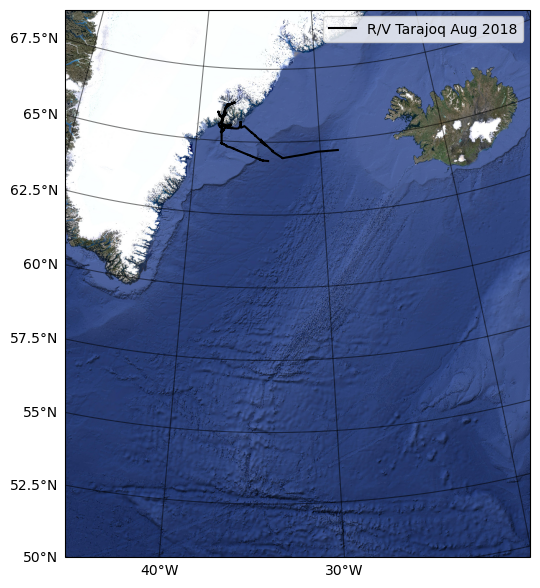

In [18]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

extent=[-45, -20, 50 ,69]
ax.set_extent(extent, crs = ccrs.PlateCarree())

tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
plt.plot(lons, lats, c= 'k', transform=ccrs.PlateCarree(), label='R/V Tarajoq Aug 2018')
plt.legend()

fig.savefig('D:/Sermilik/Figs/Map_Transect_large', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

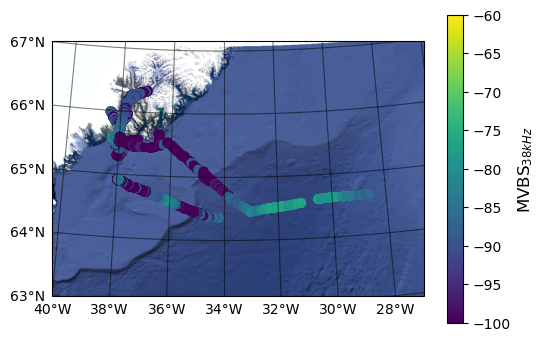

In [17]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = -34, central_latitude = 65)
ax    = plt.axes(projection = proj)

extent=[-40, -27, 63 ,67]
ax.set_extent(extent, crs = ccrs.PlateCarree())
)
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
ax_s = plt.scatter(lons, lats, c=meanSv_38, transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
ax_s.set_clim([-100,-60])

cbar = fig.colorbar(ax_s, shrink=0.5)
cbar.set_label('MVBS$_{38kHz}$', fontsize=12)


fig.savefig('D:/Sermilik/Figs/Map_MVBS', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

### Integrated NASC

In [8]:
distance_nmi = df_38[2]-df_38.iloc[0,2]

In [9]:
dist_10 = (distance_nmi/10).round().astype(int)

In [10]:
sv38 = 10**(Sv38/10)

In [11]:
df_38.iloc[:,13:16]=np.nan

In [12]:
df_38.iloc[:,13:] = df_38.iloc[:,13:].where(~(df_38.iloc[:,13:]<-900) & ~(df_38.iloc[:,13:]>900))

In [13]:
df_38

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0,0.082150,212.980025,2023-08-06,13:06:49,440.8,64.357086,-34.178786,0.0,500.0,...,-71.920358,-71.375652,-69.748210,-66.965352,-65.561631,-65.459407,-65.537529,-66.091286,-64.881422,-64.787364
1,1,0.289849,213.186313,2023-08-06,13:07:51,441.4,64.357375,-34.186719,0.0,500.0,...,-73.080625,-71.603886,-70.941511,-70.070775,-68.884426,-67.848064,-67.098327,-66.138824,-66.022196,-66.892201
2,2,0.614972,213.510993,2023-08-06,13:09:29,240.8,64.357852,-34.199132,0.0,500.0,...,-71.300996,-69.448504,-69.275027,-68.629296,-67.767704,-67.234761,-65.272488,-65.546952,-67.992539,-65.978284
3,3,1.275953,214.171384,2023-08-06,13:12:50,40.4,64.358814,-34.224376,0.0,500.0,...,-68.917408,-70.676813,-71.336272,-70.411752,-70.687188,-70.796912,-69.991820,-70.700462,-70.120865,-69.674309
4,4,1.491604,214.387345,2023-08-06,13:13:55,240.2,64.359129,-34.232610,0.0,500.0,...,-67.920877,-68.348351,-68.445371,-71.429131,-69.838884,-70.585386,-71.681945,-70.110138,-68.318636,-67.750105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,388,88.744219,1245.498327,2023-08-18,09:03:52,209.0,64.636285,-28.608662,0.0,500.0,...,-70.644644,-70.149896,-69.650503,-69.714521,-71.866035,-72.807238,-70.565692,-72.066158,-71.672241,-71.740516
13539,389,88.840996,1245.594783,2023-08-18,09:04:27,851.0,64.636297,-28.604919,0.0,500.0,...,-70.535614,-71.383713,-70.406997,-70.460081,-69.630110,-70.884791,-70.154479,-72.327341,-70.951907,-70.445606
13540,390,88.938121,1245.692191,2023-08-18,09:05:03,420.4,64.636321,-28.601169,0.0,500.0,...,-71.101325,-71.958627,-70.870746,-70.478363,-69.670703,-70.097938,-71.504134,-69.424542,-71.254730,-70.402710
13541,391,89.035046,1245.788882,2023-08-18,09:05:38,863.2,64.636355,-28.597419,0.0,500.0,...,-70.721508,-71.770658,-70.595106,-70.811978,-70.018362,-69.725646,-70.531578,-70.222098,-70.290622,-69.706532
